In [677]:
import sys
import os
sys.path.append("../../../../src/")
#Imports
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
#Custom made imports
import single_particle_sector as sps
from time import time

In [678]:
###Functions
def En(L,J,h,OBC):
    if OBC == True:
        bc = ["OBC","OBC"]
    else:
        bc = ["ABC","PBC"]
    
    ns = []
    Es = []

    for p in range(0,2):
        boundary_condition = bc[p]
        H = sps.H_bdg(h,L,J,boundary_condition)
        E, V = la.eigh(H)
        U = V.copy()
        V = V[:,:L]
        E = E[L:]
        G = sps.G_tfim(V)

        F = G[:L,L:]
        G = G[:L,:L]
        #####
        M = np.eye(L)-2*(G+F)
        n = la.det(M)*(-1)**L * (-1)**p
        Es.append(E)
        ns.append(n)
    return  Es, ns


def Zi(p,beta,Es,ns):
    E = sum(Es[p])
    Z =  (np.prod(1+np.exp(-beta*2*Es[p]))+ns[p]*np.prod(1-np.exp(-2*beta*Es[p])))/2
    return Z

def Z(beta,Es,ns):
   return Zi(0,beta,Es,ns)+Zi(1,beta,Es,ns)

def F(beta,Es,ns):
    return -np.log(Z(beta,Es,ns))/beta


def cap(p,mu,beta,Es,ns):
    pf = np.exp(-2*beta*Es[p][mu])/2/Z(beta,Es,ns)
    E = Es[p].copy()
    E = np.delete(E,mu)
    term1 = np.prod(1+np.exp(-2*beta*E))
    term2 = ns[p]*np.prod(1-np.exp(-2*beta*E))
    return pf*(term1-term2)

def acp(p,mu,beta,Es,ns):
    pf = 1/2/Z(beta,Es,ns)
    E = Es[p].copy()
    E = np.delete(E,mu)
    term1 = np.prod(1+np.exp(-2*beta*E))
    term2 = ns[p]*np.prod(1-np.exp(-2*beta*E))

    return pf*(term1+term2)

def ca(mu,beta,Es,ns):
    return cap(0,mu,beta,Es,ns)+cap(1,mu,beta,Es,ns)
def ac(mu,beta,Es,ns):
    return acp(0,mu,beta,Es,ns)+acp(1,mu,beta,Es,ns)
def E_p(p,beta,Es,ns):
    E = Es[p]
    Hp = sum([2*E[mu]*(ca(mu,beta,Es,ns)-1/2) for mu in range(L)])
    return Hp
def E_th(beta,Es,ns):
    return (E_p(0,beta,Es,ns)+E_p(1,beta,Es,ns))/2

In [679]:
#Model Parameters
L = 10
J = -1
h = 0
OBC = False
Es, ns = En(L,J,0,False)
Z(0.000001,Es,ns)


np.float64(1023.9897600563193)

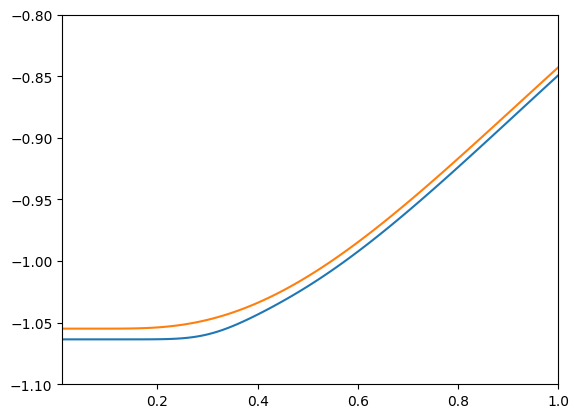

In [513]:
##Recreating Figure
T = np.linspace(0.01,1,100)
h =  0.5
L = 100
Es, ns = En(L,J,h,OBC)
E1 = [E_th(1/ti,Es,ns)/L for ti in T]
Es, ns = En(L,J,h,True)
E2 = [E_th(1/ti,Es,ns)/L for ti in T]
plt.plot(T,E1)
plt.plot(T,E2)
plt.ylim(-1.1,-.8)
plt.xlim(T[0],T[-1])
plt.show()
plt.close()

In [ ]:
## CORRECT VALUES OF S

L = 10
J = -1
OBC = False
beta = 0.10
hi = [0, 1/2, 1, 2]
for h in hi:
    print(f"h value = {h}")
    Es, ns = En(L,J,h,OBC)
    ####If lowest energy per site is defined this way it works!!!!!!
    Ei = E_th(beta,Es,ns)+np.sum(Es)/2
    #Alternatively redefine the Free energy
    #(This probably smarter)
    Fi = F(beta,Es,ns) #- np.sum(Es)/2


    print((Ei*beta-Fi*beta)/L)
    #print(ns)
    
    print("\n")


h value = 0
0.6881720698326819


h value = 0.5
0.6869785452266384


h value = 1
0.6834199893950907


h value = 2
0.6690632041792908




LINEAR ALGEBRA


In [ ]:

# Inputs: Zb = partition function values, betas = corresponding β values
# Both should be numpy arrays of same length

def compute_entropy(Zb, betas):
    lnZ = np.log(Zb)
    dlnZ_dbeta = -np.gradient(lnZ, betas)
    S = lnZ + betas * dlnZ_dbeta
    return S
plt.plot(1/betas,compute_entropy(Zb,betas)/L)


In [674]:
#LINEAR ALGEBRA
bc = ["ABC","PBC"]
ns = []
Es = []
L = 100
J = 1
beta = 100
betas = np.linspace(0,10,100)
h = 1
for p in range(0,2):
        boundary_condition = bc[p]
        H = sps.H_bdg(h,L,J,boundary_condition)
        E, V = la.eigh(H)
        U = V.copy()
        V = V[:,:L]
        E = E[L:]
        G = sps.G_tfim(V)

        F = G[:L,L:]
        G = G[:L,:L]
        #####
        M = np.eye(L)-2*(G+F)
        n = la.det(M)*(-1)**L * (-1)**p
        Es.append(E)
        ns.append(n)

(0.0, 1.0)

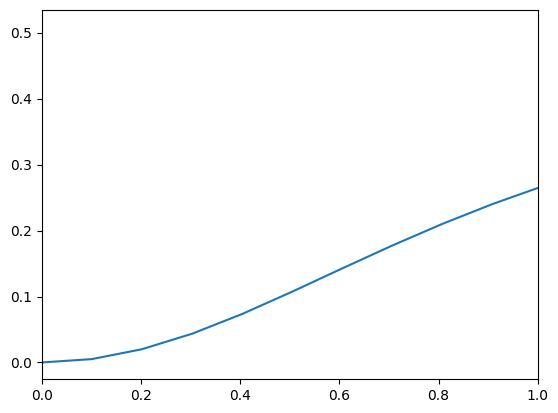

In [675]:
sigzz= []
Ms = []
for beta in betas:
    N = [ca(i,beta,Es,ns) for i in range(0,L)]
    N+= [ac(i,beta, Es, ns) for i in range(0,L)]

    G = U@np.diag(N)@U.T.conj()
    F = G[:L,L:]
    G = G[:L,:L]
    M = np.eye(L)-2*(F+G)
    Ms.append(M)

    sigzz+= [4*(G[0,0]-1/2)*(G[1,1]-1/2)+4*G[0,1]*(-G[1,0])+4*np.square(F[0,1])]
plt.plot(betas,sigzz)
#plt.ylim(0,1)
plt.xlim(0,1)

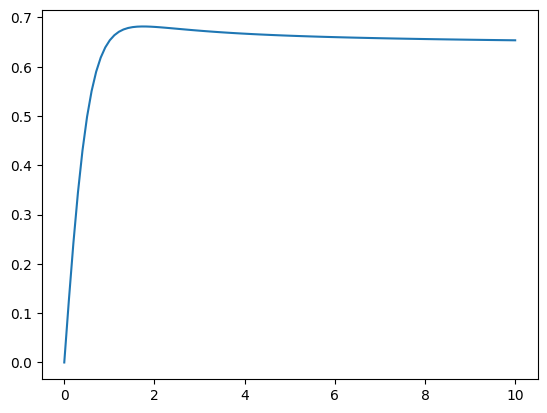

In [676]:
plt.plot(betas,[Ms[i][0,1] for i in range(len(betas))])

In [657]:
###Functions
def Gn(beta,L,J,h,OBC):
    if OBC == True:
        bc = ["OBC","OBC"]
    else::
        H = sps.H_bdg(h,L,J,boundary_condition)
        E, V = la.eigh(H)
        U = V.copy()
        Us.append(U)
        V = V[:,:L]
        E = E[L:]
        G = sps.G_tfim(V)

        F = G[:L,L:]
        G = G[:L,:L]
        #####
        M = np.eye(L)-2*(G+F)
        n = la.det(M)*(-1)**L * (-1)**p
        Es.append(E)
        ns.append(n)
    #Now, calculate Z

    Z_p = [Zi(0,beta,Es,ns),Zi(1,beta,Es,ns)]
    #calculate correlations

    N0 = np.diag([cap(0,mu,beta,Es,ns) for mu in range(L)]+[acp(0,mu,beta,Es,ns) for mu in range(L)])
    N1 = np.diag([cap(1,mu,beta,Es,ns) for mu in range(L)]+[acp(1,mu,beta,Es,ns) for mu in range(L)])
    #print(N0)
    Ns = [N0,N1]

    Gs = [Us[p]@Ns[p]@Us[p].T.conj() for p in range(2)]

    G = (Z_p[0]*Gs[0]+Z_p[1]*Gs[1])/np.sum(Z_p)

    
    return  G

2*(Gn(1,20,1,100,False)[0,0]-1/2)

SyntaxError: invalid syntax (2126612747.py, line 5)

np.float64(-0.5)